## Meal Delivery Prediction

In [53]:
import pandas as pd
import numpy as np

### Reading csv file and doing EDA
__There are 3 csv file, have to merge__


In [54]:
center_df = pd.read_csv('Meal delivery data/fulfilment_center_info.csv', header=0)
center_df.head(2)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7


In [55]:
meal_df = pd.read_csv('Meal delivery data/meal_info.csv', header=0)
meal_df.head(2)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai


In [56]:
df1 = pd.read_csv('Meal delivery data/train.csv', header=0)
df1.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270


In [57]:
#Merging all the 3 csv files
train_df1 = pd.merge(df1,meal_df, how='outer', on = 'meal_id')
train_df1.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai


In [58]:
final_train = pd.merge(train_df1,center_df, how='outer',on='center_id')
final_train.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0


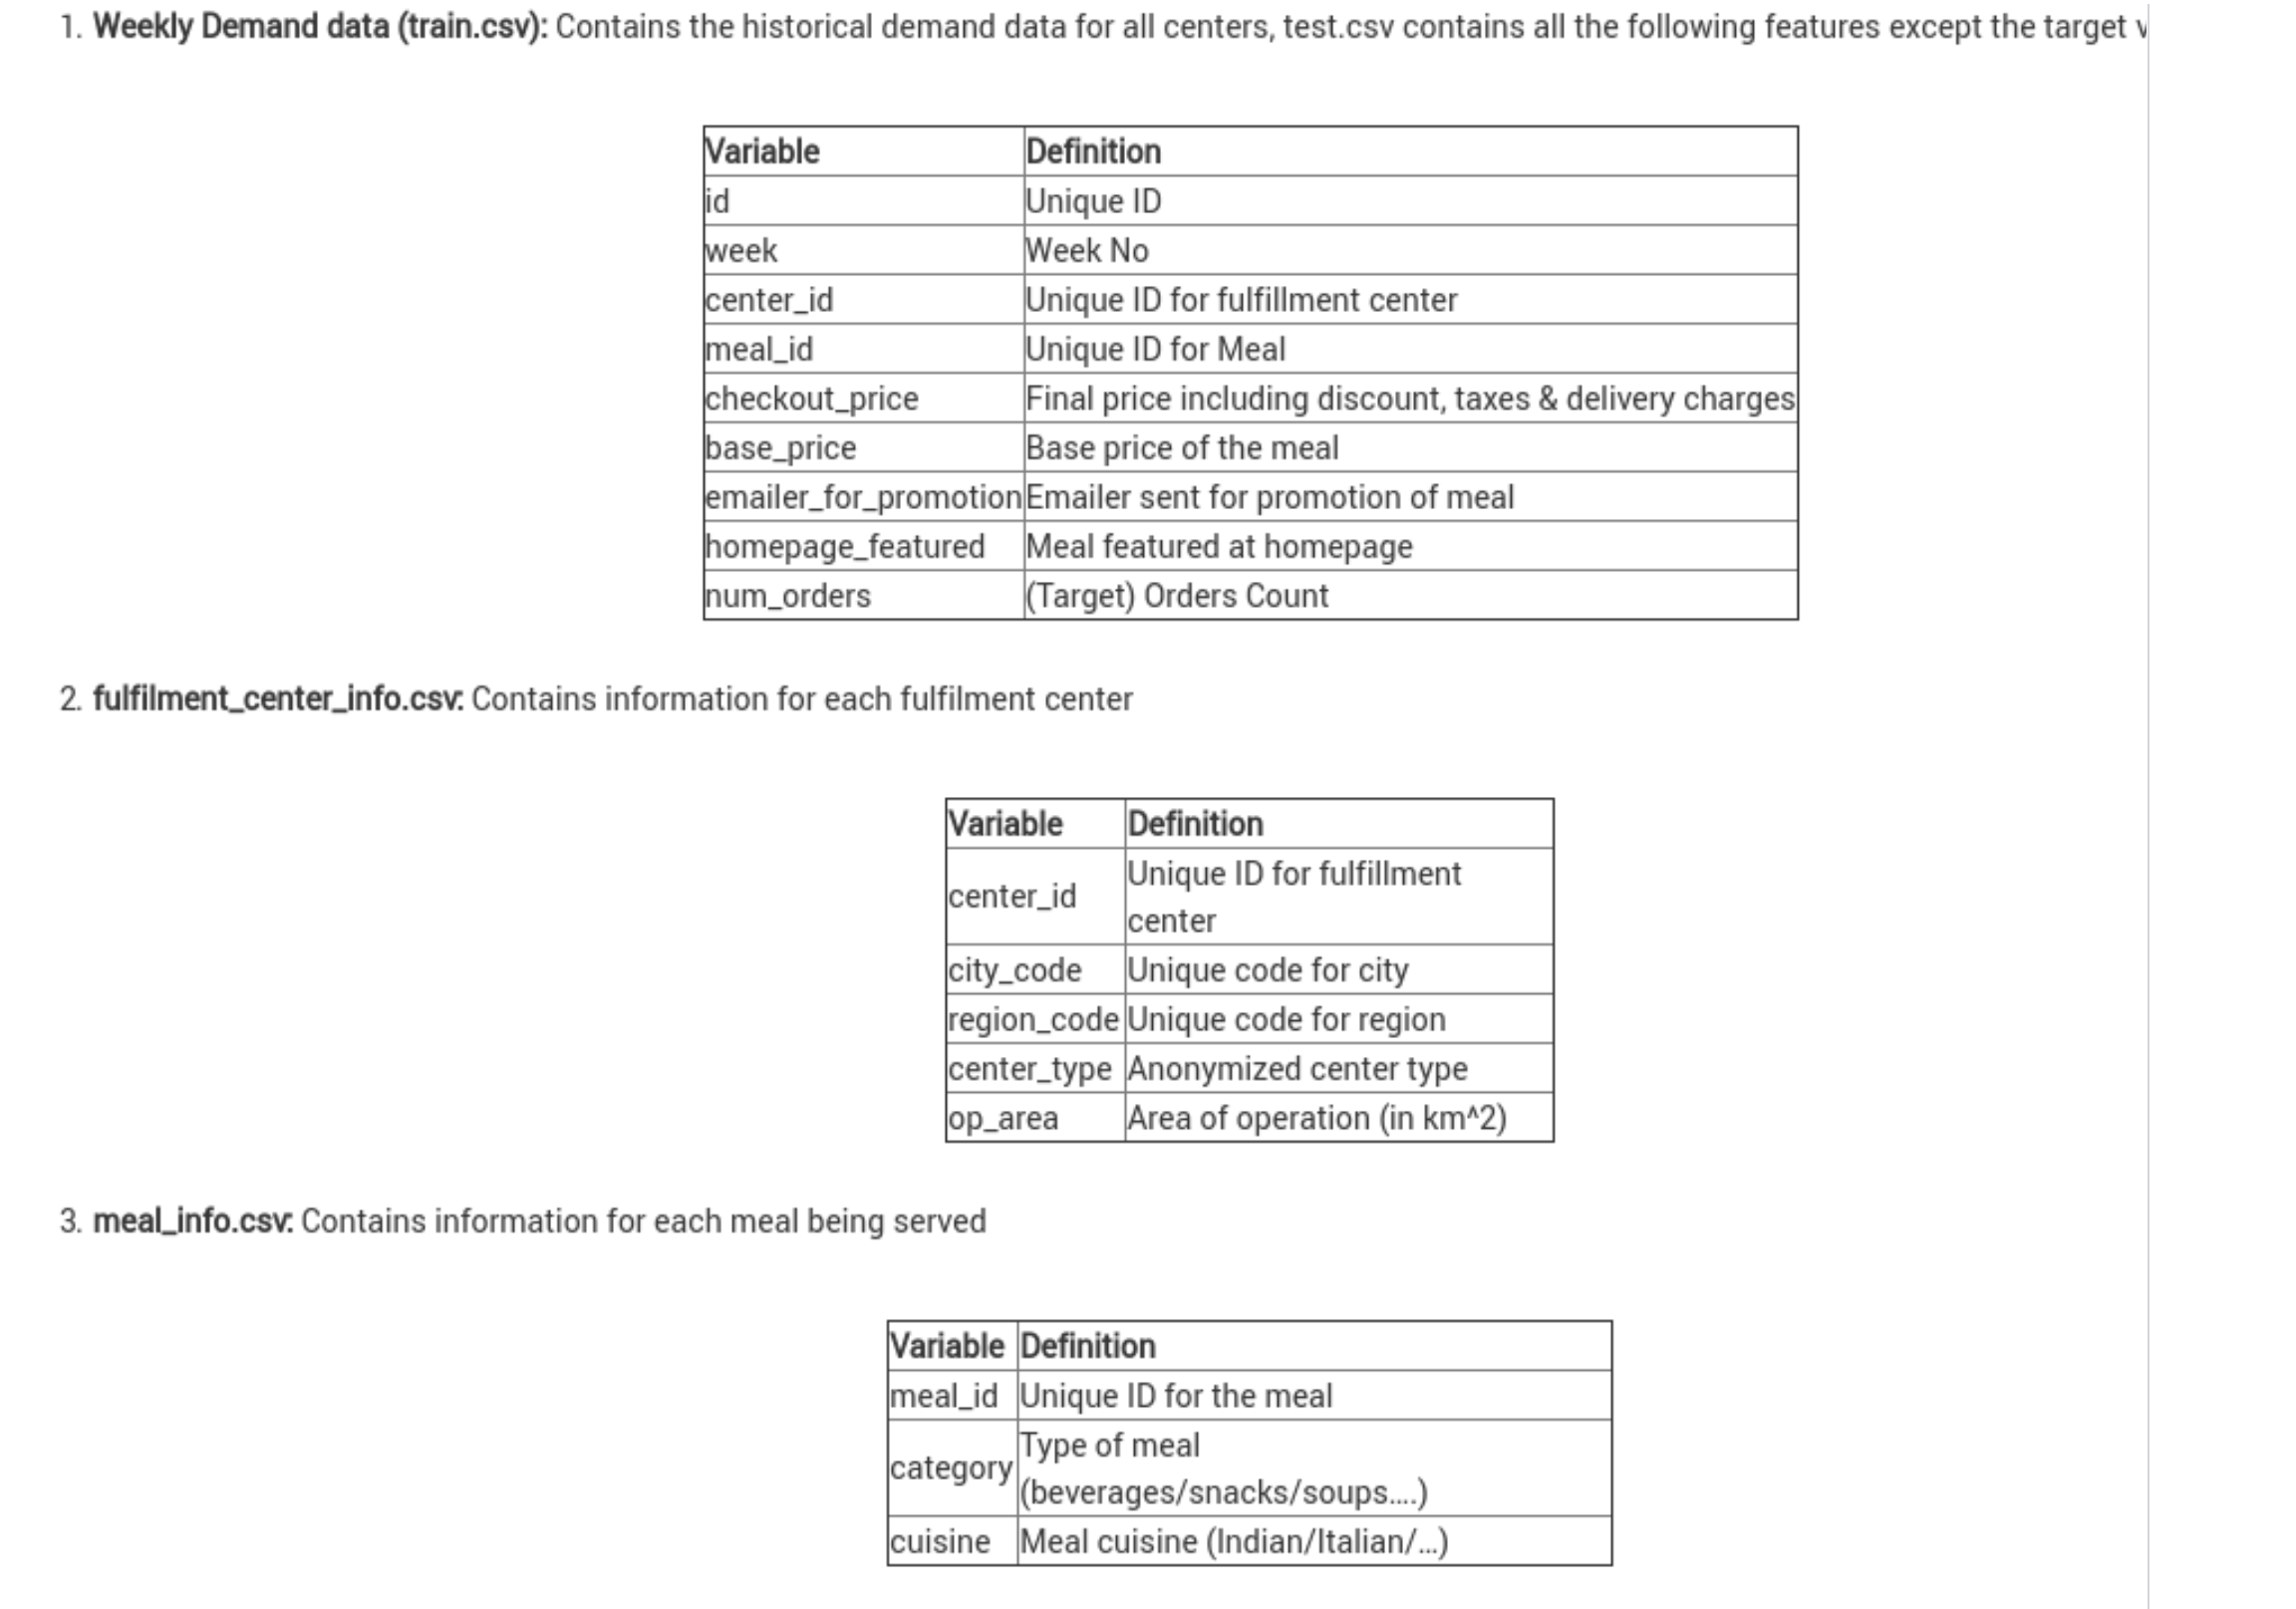

In [59]:
final_train.shape

(456548, 15)

In [60]:
# import sys
# !{sys.executable} -m pip install pandas-profiling

In [61]:
#import pandas_profiling as pp


In [62]:
#pp.ProfileReport(meal_df)


### EDA

In [63]:
final_train.shape

(456548, 15)

In [64]:
final_train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [65]:
#Cheking for missing values
final_train.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [66]:
final_train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [67]:
#Getting unique values
for i in final_train.columns:
    print('Number of unique values in {} column are {} \n The unique values are {}'. format(i, len(final_train[i].unique()), final_train[i].unique()))
    print('-------------------------------\n')

Number of unique values in id column are 456548 
 The unique values are [1379560 1018704 1196273 ... 1029231 1141147 1443704]
-------------------------------

Number of unique values in week column are 145 
 The unique values are [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145]
-------------------------------

Number of unique values in center_id column are 77 
 The unique values are [ 55  24  11  83  32  13 109  52  93 186 146  57 149  89 124 152  97  74

In [68]:
cat_cols = []
for i in final_train.columns:
    if final_train[i].dtype == 'object':
     cat_cols.append(i)
    print('{} : {} : {}'. format(i, len(np.unique(final_train[i])), np.unique(final_train[i])))
   
     
 

id : 456548 : [1000000 1000001 1000002 ... 1499997 1499998 1499999]
week : 145 : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145]
center_id : 77 : [ 10  11  13  14  17  20  23  24  26  27  29  30  32  34  36  39  41  42
  43  50  51  52  53  55  57  58  59  61  64  65  66  67  68  72  73  74
  75  76  77  80  81  83  86  88  89  91  92  93  94  97  99 101 102 104
 106 108 109 110 113 124 126 129 132 137 139 143 145 146 149 152 153 157
 161 162 174 177 186

In [69]:
cat_cols

['category', 'cuisine', 'center_type']

## Visualization
### Bivariate anlysis(Numeric variable with target variable)

In [70]:
import seaborn as sns
from matplotlib import pyplot as plt

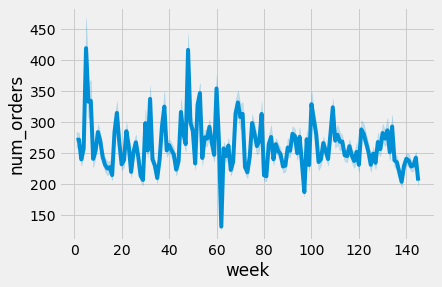

In [71]:
sns.lineplot(final_train['week'],final_train['num_orders'])

In [72]:
#train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
final_train.groupby('week')['num_orders'].mean()

week
1      271.136550
2      271.783149
3      239.828217
4      257.365524
5      419.263729
          ...    
141    237.891511
142    228.431439
143    229.932224
144    242.639915
145    205.607711
Name: num_orders, Length: 145, dtype: float64

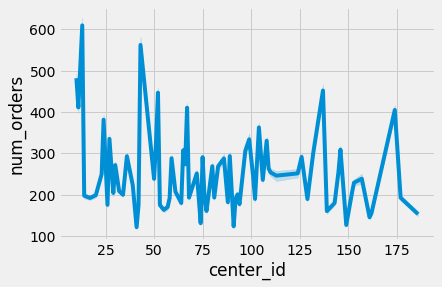

In [73]:
sns.lineplot(final_train['center_id'],final_train['num_orders'])


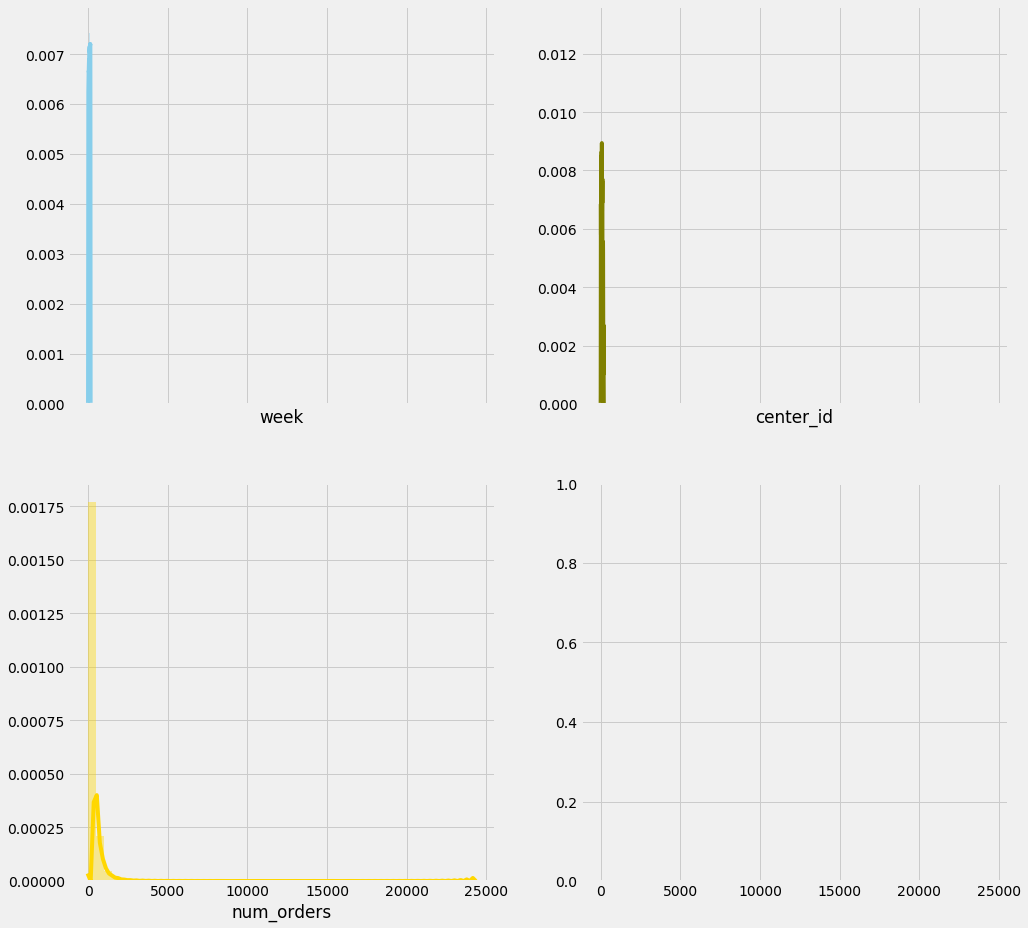

In [74]:
f, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True)
sns.distplot( final_train["week"] , color="skyblue", ax=axes[0, 0])
sns.distplot( final_train["center_id"].dropna() , color="olive", ax=axes[0, 1])
sns.distplot( final_train['num_orders'].dropna() , color="gold", ax=axes[1, 0])
plt.savefig('pr1')

### Tatget variable analysis

Text(0.5, 1.0, 'num_orders Distribution')

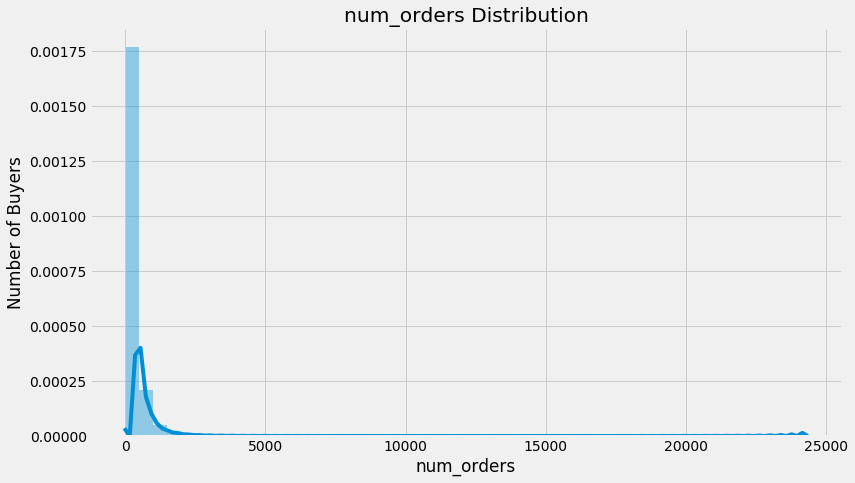

In [75]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(final_train.num_orders)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [76]:
#Taking log of target variable and do plot
final_train['num_orders_log'] = np.sqrt(final_train['num_orders'])

Text(0.5, 1.0, 'num_orders Distribution_LogTransfermation')

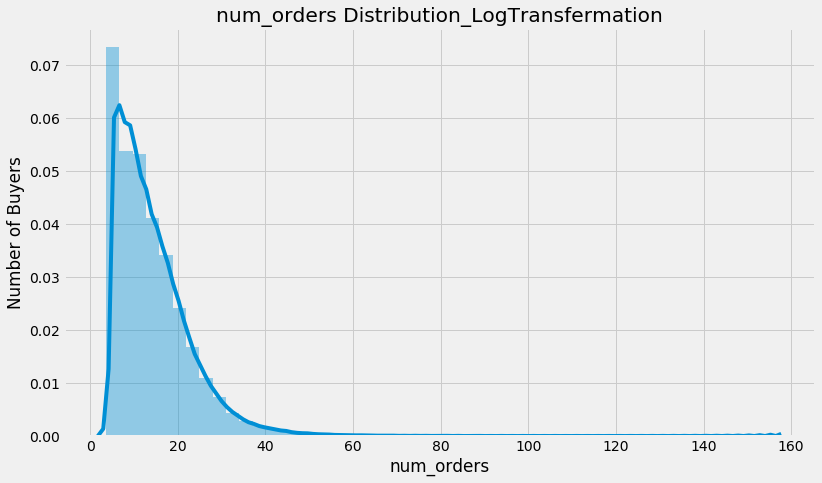

In [77]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(final_train.num_orders_log)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution_LogTransfermation")

In [78]:
final_train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'num_orders_log'],
      dtype='object')

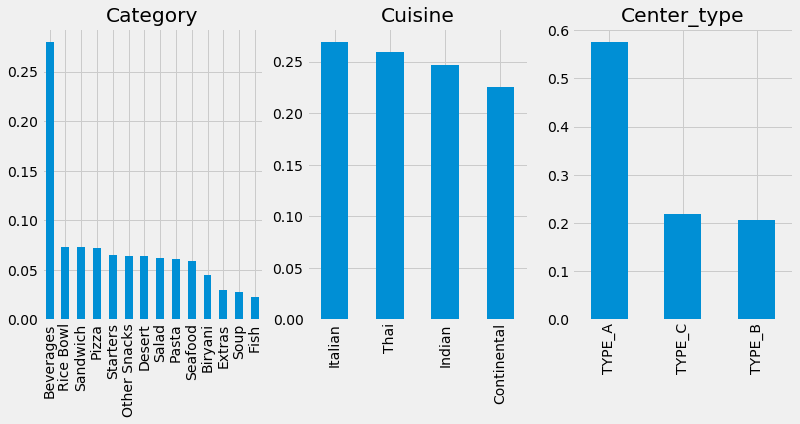

In [79]:
plt.figure(3)

plt.subplot(131)
final_train['category'].value_counts(normalize = True).plot.bar(figsize = (12,5), title = 'Category')

plt.subplot(132)
final_train['cuisine'].value_counts(normalize=True).plot.bar(figsize = (12,5), title = "Cuisine")

plt.subplot(133)
final_train['center_type'].value_counts(normalize = True).plot.bar(figsize = (12,5), title = 'Center_type')



#### Observation
* Bevareges highly delivery item
* Type_A center have more delivery

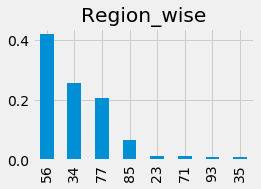

In [80]:
plt.figure(1)

plt.subplot(231)
final_train['region_code'].value_counts(normalize = True).plot.bar(figsize = (12,5), title = 'Region_wise')

#### OBSERVTION
* There are 8 regions are there
* Region 56 has got higher number of orders


In [81]:
region56_df = final_train[final_train['region_code']==56]

In [82]:
region56_df['cuisine'] = final_train['cuisine']

C:\Users\hanitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
region56_df['region_code'].nunique()

1

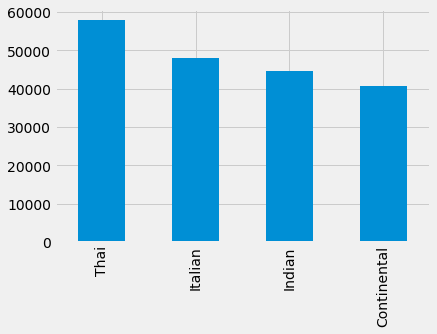

In [52]:
region56_df['cuisine'].value_counts().plot.bar()

In [84]:
region34_df = final_train[final_train['region_code']==34]

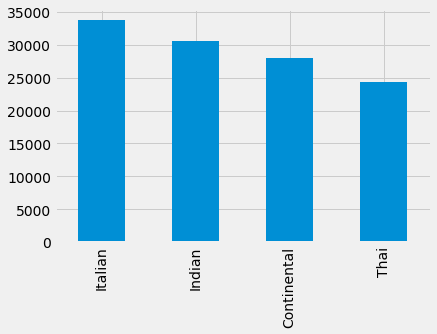

In [86]:
region34_df['cuisine'].value_counts().plot.bar()

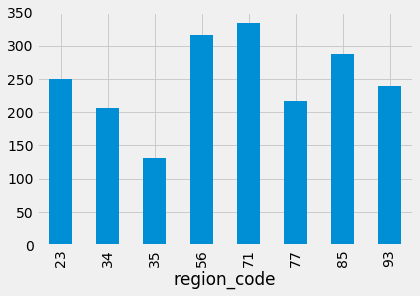

In [51]:
final_train.groupby('region_code')['num_orders'].mean().plot.bar()

### Cusine wise exploration

_Italian Cuisine_

In [8]:
italian_cuisine = final_train[final_train['cuisine'] == 'Italian']
print(italian_cuisine.columns)

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')


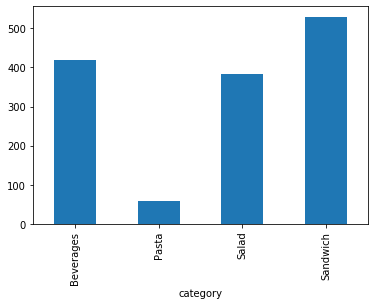

In [9]:
italian_cuisine.groupby('category')['num_orders'].mean().plot.bar()

#### Observation
* Italian cusine has more of Sandwitch orders than Pasta 
* have to check the Italian cusine with 

In [36]:
temp=italian_cuisine.groupby('center_type').count()

In [37]:
temp

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,op_area
center_type,,,,,,,,,,,,,,
TYPE_A,69471,69471,69471,69471,69471,69471,69471,69471,69471,69471,69471,69471,69471,69471
TYPE_B,24348,24348,24348,24348,24348,24348,24348,24348,24348,24348,24348,24348,24348,24348
TYPE_C,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106


In [87]:
final_train.fillna(final_train.mode().iloc[0])

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,num_orders_log
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,13.304135
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,17.972201
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,9.797959
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,12.767145
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,14.662878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5,3.605551
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5,6.480741
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5,6.324555
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5,7.280110
